In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import Datasets
weatherData = pd.read_csv('cities.csv')
airPollutionData = pd.read_csv('global_air_pollution_data.csv')

In [3]:
weatherData.rename(columns={'country' : 'country_name'}, inplace=True)
weatherData.head()

,station_id,city_name,country_name,state,iso2,iso3,latitude,longitude
0,41515,Asadabad,Afghanistan,Kunar,AF,AFG,34.866000,71.150005
1,38954,Fayzabad,Afghanistan,Badakhshan,AF,AFG,37.129761,70.579247
2,41560,Jalalabad,Afghanistan,Nangarhar,AF,AFG,34.441527,70.436103
3,38947,Kunduz,Afghanistan,Kunduz,AF,AFG,36.727951,68.872530
4,38987,Qala i Naw,Afghanistan,Badghis,AF,AFG,34.983000,63.133300


In [4]:
airPollutionData.rename(columns={'co_aqi_value\t' : 'co_aqi_value'}, inplace=True)
airPollutionData.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [5]:
# Merge both of datasets
mergeData = pd.merge(weatherData, airPollutionData, on=['city_name', 'country_name'], how='inner')
mergeData.head(596)

,station_id,city_name,country_name,state,iso2,iso3,latitude,longitude,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,41515,Asadabad,Afghanistan,Kunar,AF,AFG,34.866000,71.150005,131,Unhealthy for Sensitive Groups,1,Good,43,Good,0,Good,131,Unhealthy for Sensitive Groups
1,13577,Peshkopi,Albania,Dibër,AL,ALB,41.683302,20.433303,115,Unhealthy for Sensitive Groups,1,Good,39,Good,0,Good,115,Unhealthy for Sensitive Groups
2,13615,Tirana,Albania,Durrës,AL,ALB,41.327541,19.818883,73,Moderate,1,Good,45,Good,1,Good,73,Moderate
3,60620,Adrar,Algeria,Adrar,DZ,DZA,27.869990,-0.289967,106,Unhealthy for Sensitive Groups,0,Good,45,Good,0,Good,106,Unhealthy for Sensitive Groups
4,60369,Algiers,Algeria,Alger,DZ,DZA,36.763065,3.050553,154,Unhealthy,10,Good,33,Good,69,Moderate,154,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,67663,Kabwe,Zambia,Central,ZM,ZMB,-14.440011,28.449984,27,Good,1,Good,19,Good,0,Good,27,Good
592,68030,Livingstone,Zambia,Southern,ZM,ZMB,-17.860009,25.860013,27,Good,1,Good,17,Good,0,Good,27,Good
593,67633,Mongu,Zambia,Western,ZM,ZMB,-15.279598,23.120025,43,Good,1,Good,19,Good,0,Good,43,Good
594,67775,Harare,Zimbabwe,Harare,ZW,ZWE,-17.817790,31.044709,61,Moderate,3,Good,14,Good,2,Good,61,Moderate


In [6]:
# Display the length of 'mergeData'
print("Length of 'mergeData' =", len(mergeData), "rows")

Length of 'mergeData' = 596 rows


Data Selection

In [7]:
# Drop Columns
mergeData.drop(columns=['station_id', 'state', 'iso2', 'iso3', 'aqi_category', 'co_aqi_category', 'ozone_aqi_category', 
                        'no2_aqi_category', 'pm2.5_aqi_value', 'pm2.5_aqi_category'], inplace=True)

Data Pre-processing

In [8]:
# Remove missing values in columns
mergeData.dropna(subset=['latitude', 'longitude', 'aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value'], inplace=True)
mergeData.head()

,city_name,country_name,latitude,longitude,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value
0,Asadabad,Afghanistan,34.866000,71.150005,131,1,43,0
1,Peshkopi,Albania,41.683302,20.433303,115,1,39,0
2,Tirana,Albania,41.327541,19.818883,73,1,45,1
3,Adrar,Algeria,27.869990,-0.289967,106,0,45,0
4,Algiers,Algeria,36.763065,3.050553,154,10,33,69


In [9]:
# Display the length of 'mergeData'
print("Length of 'mergeData' =", len(mergeData), "rows")

Length of 'mergeData' = 596 rows


Data Transformation

In [10]:
# Features Selection
features = mergeData[['latitude', 'longitude', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value']]
target = mergeData['aqi_value']

Data Mining

In [11]:
# Initialize Gradient Boosting Model
GBModel = GradientBoostingRegressor(n_estimators=300, random_state=42, learning_rate=0.1)

# Set the K-Fold Cross Validation with 5 folds
KFoldSplit = KFold(n_splits=5, shuffle=True, random_state=42)

# Array to hold the value of each prediction
aqi_value_predict = np.zeros(len(mergeData))

# List to hold the MSE value of each fold
MSEScores = []

for train_index, test_index in KFoldSplit.split(features):
    # Split data into training and testing based on fold index
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Model training
    GBModel.fit(X_train, y_train)

    # Model testing
    prediction = GBModel.predict(X_test)
    
    # Saving the prediction into array
    aqi_value_predict[test_index] = prediction

    # Calculate the MSE value then add it into the list
    mse = mean_squared_error(y_test, prediction)
    MSEScores.append(mse)

# Add the prediction value as a new column in 'mergeData'
mergeData['aqi_value_predict'] = aqi_value_predict

In [12]:
# Display the MSE values of each fold
print("MSE values of each fold =", MSEScores)

MSE values of each fold = [np.float64(491.7853941729373), np.float64(1131.8598175861637), np.float64(545.4081853940112), np.float64(424.1762803608011), np.float64(1064.5519902066862)]


In [13]:
# Calculate the average MSE value of all folds
averageMSE = np.mean(MSEScores)
# Calculate the standard deviation of 'aqi_value'
aqiStandardDeviation = mergeData['aqi_value'].std()
# Calculate the range of 'aqi_value'
aqiRange = mergeData['aqi_value'].max() - mergeData['aqi_value'].min()

print("Average MSE value =", round(averageMSE, 2))
print("Standard Deviation of 'aqi_value' =", round(aqiStandardDeviation, 2))
print("Maximum =", mergeData['aqi_value'].max(), "\nMinimum =", mergeData['aqi_value'].min())
print(f"Range of 'aqi_value' =", aqiRange)

Average MSE value = 731.56
Standard Deviation of 'aqi_value' = 46.85
Maximum = 365 
Minimum = 8
Range of 'aqi_value' = 357


In [14]:
# Display and sort the importance of each features
featuresImportance = pd.Series(GBModel.feature_importances_, index=features.columns)
print(featuresImportance.sort_values(ascending=False))

co_aqi_value       0.438896
latitude           0.210921
ozone_aqi_value    0.194106
longitude          0.131615
no2_aqi_value      0.024462
dtype: float64


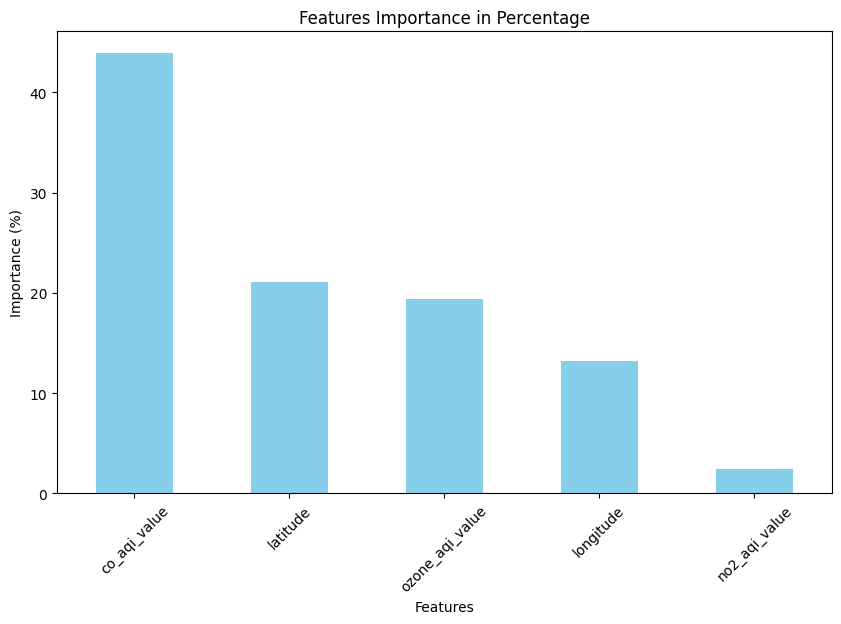

In [15]:
# Convert to DataFrame
featuresImportancesData = pd.Series(featuresImportance).sort_values(ascending=False)

# Convert to percentage
feature_importances_percent = featuresImportancesData * 100

# Visualize the importance of each features
plt.figure(figsize=(10, 6))
feature_importances_percent.plot(kind='bar', color='skyblue')
plt.xlabel("Features")
plt.ylabel("Importance (%)")
plt.title("Features Importance in Percentage")
plt.xticks(rotation=45)
plt.show()

Model Evaluation

In [16]:
# Calculate the percentage similarity between 'aqi_value' and 'aqi_value_predict'
mergeData['similarity_percentage'] = 100 - (abs(mergeData['aqi_value'] - mergeData['aqi_value_predict']) / mergeData['aqi_value']) * 100
average_similarity = mergeData['similarity_percentage'].mean()
# Calculate the Coefficient of Determination (R^2) Score
r2Score = r2_score(y_test, prediction)

print("Average similarity between 'aqi_value' and 'aqi_value_predict' =", round(average_similarity, 2), "%")
print("R² Score =", round(r2Score, 2))

Average similarity between 'aqi_value' and 'aqi_value_predict' = 70.31 %
R² Score = 0.62


In [17]:
mergeData.head(596)

,city_name,country_name,latitude,longitude,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,aqi_value_predict,similarity_percentage
0,Asadabad,Afghanistan,34.866000,71.150005,131,1,43,0,89.736187,68.500906
1,Peshkopi,Albania,41.683302,20.433303,115,1,39,0,54.459519,47.356103
2,Tirana,Albania,41.327541,19.818883,73,1,45,1,64.783394,88.744375
3,Adrar,Algeria,27.869990,-0.289967,106,0,45,0,91.062415,85.907939
4,Algiers,Algeria,36.763065,3.050553,154,10,33,69,163.261401,93.986103
...,...,...,...,...,...,...,...,...,...,...
591,Kabwe,Zambia,-14.440011,28.449984,27,1,19,0,38.979134,55.632838
592,Livingstone,Zambia,-17.860009,25.860013,27,1,17,0,27.646545,97.605390
593,Mongu,Zambia,-15.279598,23.120025,43,1,19,0,42.550651,98.955002
594,Harare,Zimbabwe,-17.817790,31.044709,61,3,14,2,88.291120,55.260459
